In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("/content/final_preprocessed_visibility_data.csv")
df.head()

,DATE,VISIBILITY,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure
0,2010-01-01 00:51:00,6.0,33,92,0,0,29.99
1,2010-01-01 01:51:00,6.0,33,96,0,0,29.99
2,2010-01-01 02:51:00,5.0,33,96,0,0,29.99
3,2010-01-01 03:51:00,5.0,33,96,0,0,29.97
4,2010-01-01 04:51:00,5.0,33,92,0,0,29.96


In [9]:
X = df.drop(['VISIBILITY', 'DATE'], axis=1)
y = df['VISIBILITY']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (75083, 5)
Target shape: (75083,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [13]:
lr_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
print("Linear Regression Results")
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 :", r2_score(y_test, y_pred_lr))

Linear Regression Results
MAE : 1.2779449190927885
RMSE: 1.9229534310485144
R2 : 0.25395113747711495


In [14]:
ridge_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("Ridge Regression Results")
print("MAE :", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R2  :", r2_score(y_test, y_pred_ridge))

Ridge Regression Results
MAE : 1.2779385531860787
RMSE: 1.9229534884955208
R2  : 0.25395109290164697


In [15]:
rf_pipeline = Pipeline(steps=[
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest Results")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2  :", r2_score(y_test, y_pred_rf))

Random Forest Results
MAE : 0.6001787071715549
RMSE: 1.399448029644959
R2  : 0.6048670118423327


In [18]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_rf)
    ]
})

results



,Model,MAE,RMSE,R2 Score
0,Linear Regression,1.277945,1.922953,0.253951
1,Ridge Regression,1.277939,1.922953,0.253951
2,Random Forest,0.600179,1.399448,0.604867


In [19]:
best_model = results.sort_values(by="RMSE").iloc[0]
best_model

,2
Model,Random Forest
MAE,0.600179
RMSE,1.399448
R2 Score,0.604867


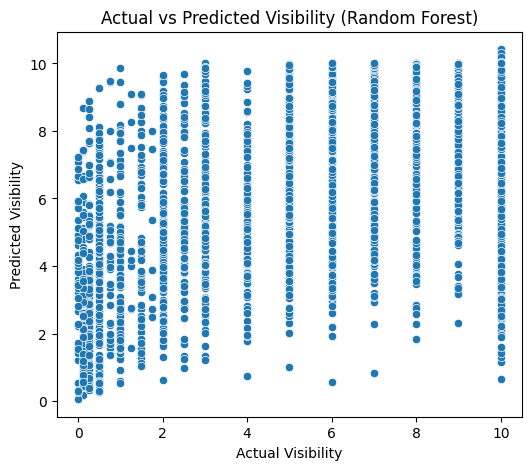

In [20]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Visibility")
plt.ylabel("Predicted Visibility")
plt.title("Actual vs Predicted Visibility (Random Forest)")
plt.show()

In [21]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_pipeline.named_steps['model'].feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
1,RelativeHumidity,0.465711
0,DRYBULBTEMPF,0.183847
4,SeaLevelPressure,0.146864
3,WindDirection,0.105881
2,WindSpeed,0.097697


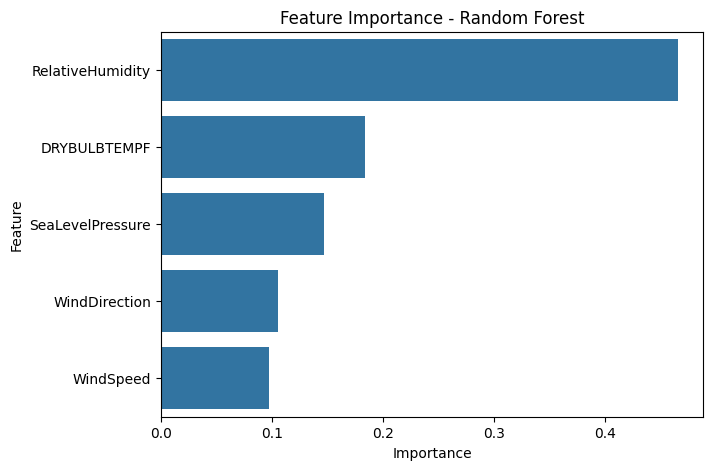

In [22]:
plt.figure(figsize=(7,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance
)
plt.title("Feature Importance - Random Forest")
plt.show()

In [23]:
import joblib
joblib.dump(rf_pipeline, "final_visibility_model.pkl")

['final_visibility_model.pkl']